In [ ]:
def update_plot(amp,phase,freq):
    ax.clear()
    units='amp={} '
    y= amp*np.sin(2*np.pi*(freq*x-phase))
    ax.plot(x,y)
    plt.show()
    
amp=widgets.FloatSlider(min=1,max=10,value=2,description='Amplitude')
phase=widgets.FloatSlider(min=0,max=6,value=0,description='Phase')
freq=widgets.FloatSlider(min=1,max=10,value=1,description='Frequency')

display(amp)
display(phase)
display(freq)
x=np.linspace (0,2,1000)
fig,ax=plt.subplots(1,figsize=(7,3))
plt.suptitle('Sine Wave')

widgets.interactive(update_plot,amp=amp,phase=phase,freq=freq)

In [5]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

In [2]:
import ipyvolume as ipv
import numpy as np
x, y, z = np.random.random((3, 10000))

In [10]:
import scipy.ndimage as snd
data = np.arange(16).reshape(4, 4).astype(np.float)
data[0, 3] = 0
data[0, 1:3] = 5
data

array([[ 0.,  5.,  5.,  0.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

(2500,)

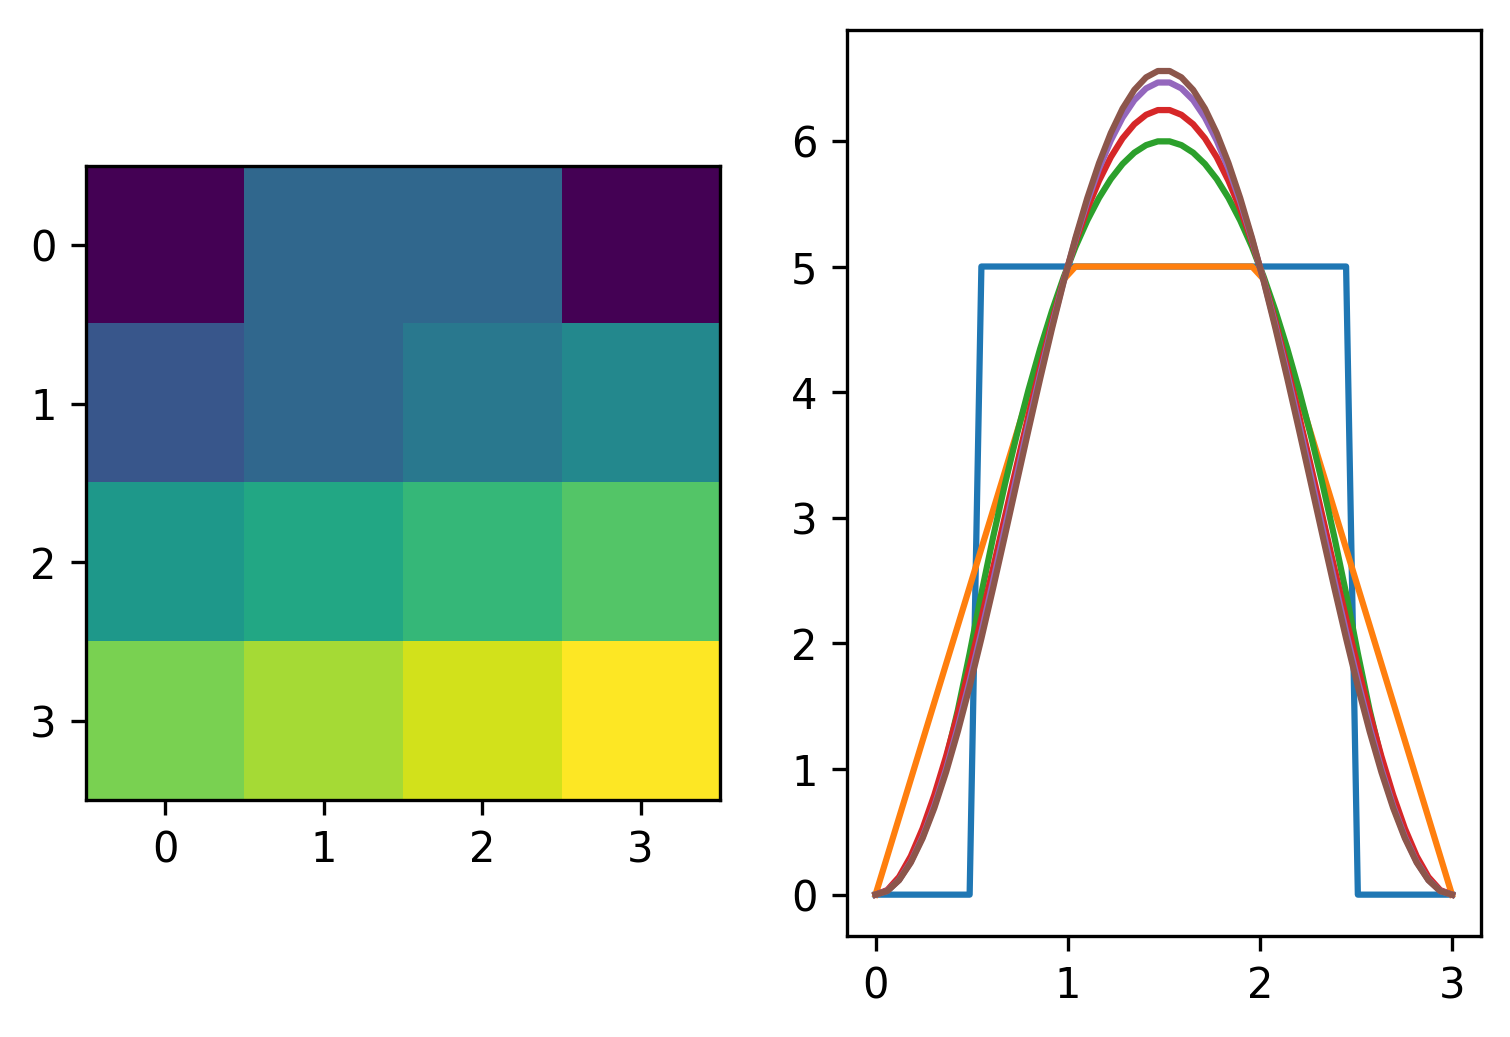

In [28]:
# visualisation only
f, axs = plt.subplots(1, 2, dpi=300)
ax_2d, ax_scan = axs
ax_2d.imshow(data)

# refine grid: build grid
X, Y = np.mgrid[0:3:50j, 0:3:50j]
positions = np.vstack([X.ravel(), Y.ravel()])

for order in range(6):
    # refine grid: fit splines, re-evaluate function on grid
    a = snd.map_coordinates(data, positions, mode='nearest', order=order)
    ax_scan.plot(np.linspace(0, 3, 50), a[0:50], label='Order %d' % order)
X.ravel().shape

In [ ]:
def resample(rho, npoints, NX, NY, NZ, X, Y, Z):
    Xs, Ys, Zs = np.mgrid[0:(NX-1):complex(npoints), 0:(NY-1):complex(npoints), 0:(NZ-1):complex(npoints)]
    positions = np.vstack([Xs.ravel(), Ys.ravel(), Zs.ravel()])
    newrho = snd.map_coordinates(rho, positions, mode='nearest', order=3)
    return newrho.reshape(npoints, npoints, npoints), npoints, npoints, npoints, X*NX/npoints, Y*NY/npoints, Z*NZ/npoints   